УСТАНОВКА PSYCOPG2

In [56]:
# !pip install psycopg2

Начинаем с импорта библиотек

In [8]:
import pandas as pd
import psycopg2
import warnings
warnings.filterwarnings("ignore")

# для загрузок логин пароль
import os
from dotenv import load_dotenv

базы параметры

Создаем соединение с заданными параметрами

In [11]:
# загрузка данных из ".env"
load_dotenv()

connection = psycopg2.connect(
    dbname=os.getenv('DBNAME'),
    user=os.getenv('USER'),
    host=os.getenv('HOST'),
    password=os.getenv('PASSWORD'),
    port=os.getenv('PORT')
)

Запрос

In [60]:
def zapr(query ):
    """Функция запроса к базе SQL

    Args:
        query (_str_): запрос принимаем в виде строки

    Returns:
        df: Возвращаем полученый DataFrame
    """
    global connection 
    # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
    df = pd.read_sql_query(query, connection)#, index_col='id')
    return df 


### 3.1
Сколько вакансий есть в базе

In [61]:
# код запроса представляет из себя строковую переменную
# вывести количество строк колонки id
query = f'''select COUNT(id) 
            from vacancies
         '''
# вывести результат 
print('Количество вакансий:', zapr(query )['count'].iloc[0])

Количество вакансий: 49197


### Вывод
Количество вакансий: $49197$, что соответствует количеству строк в таблице "vacancies"

Название вакансий могут быть одинаковы так как предложения могут поступать от разных работатателей, но id у них уникальны по этому считаем по id


### 3.2
Сколько работодателей

In [62]:
# код запроса представляет из себя строковую переменную
# вывести количество строк колонки id
query = f'''select COUNT(id)
            from employers            
        '''
# вывести результат
print('Количество работодателей:', zapr(query )['count'].iloc[0])

Количество работодателей: 23501


### Вывод
Количество работодателей: $23501$, что соответствует количеству строк в таблице "employers"

Имена работодателей могут быть одинаковы но id у них уникальны так как сфера деятельность может отличатся, поэтому считаем по id

### 3.3
Сколько регионов

In [63]:
# код запроса представляет из себя строковую переменную
# вывести количество строк колонки id
query = f'''select COUNT(id)
            from areas            
        '''
# вывести результат
print('Количество регионов:', zapr(query )['count'].iloc[0])

Количество регионов: 1362


### Вывод
Количество регионов: $1362$, что соответствует количеству строк в таблице "areas"

Имена регионов могут быть одинаковы но id у них уникальны по этому считаем по id

### 3.4
Сколько сфер деятельности

In [64]:
# код запроса представляет из себя строковую переменную
# вывести количество строк колонки id
query = f'''select COUNT(id)
            from industries  
        '''
# вывести результат
print('Количество сфер деятельности:', zapr(query )['count'].iloc[0])

Количество сфер деятельности: 294


### Вывод
Количество сфер деятельности: $294$, что соответствует количеству строк в таблице "employers"

Имена регионов могут быть одинаковы но id у них уникальны по этому считаем по id

### 4.1
Запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area)

In [65]:
# код запроса представляет из себя строковую переменную
# по id присваеваим название регионов, группируем по регионам и считаем сколько id вошло в регион.
# Затем сортируем в порядке убывания по количеству вошедших id и выводим 5 первых строк

n = 5 #  количество выводимых строк

query = f'''select a.name AS area,
                  COUNT(v.id) AS cnt
            from VACANCIES AS v
               LEFT JOIN AREAS AS a ON v.area_id=a.id
            GROUP BY a.name
            ORDER BY COUNT(v.id) DESC
            LIMIT {n}
         '''
# вывести результат
zapr(query)

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


### Вывод
Мы нашли 5 городов которые по количеству вакансий находятся на 1 местах, а из них можно выделить Москву по количеству вакансий

### 4.2
Количество вакансий заполнено хотя бы одно из двух полей с зарплатой

In [66]:
# код запроса представляет из себя строковую переменную
# Производим фильтрацию по заполнению ячеек, затем вывести количество строк оставшихся колонак id

query = f'''select COUNT(id)
            from VACANCIES
            WHERE salary_from is NOT NULL OR salary_to is NOT NULL
               
         '''
# вывести результат
print('количество вакансий:', zapr(query)['count'].iloc[0])

количество вакансий: 24073


### Вывод
Мы нашли количество вакансий: $24073$ в которых заполнено хотя бы одно из двух полей с зарплатой

У нас много ячеек с неуказанной зарплатой почти половина

### 4.3
средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого числа

In [67]:
# код запроса представляет из себя строковую переменную
# Применяем агрегирующую функцию AVG которая высчитавает средние значения ячеек не учитывая ячейки с NULL
query = f'''select ROUND(AVG(salary_from)) AS AVG_MIN,
                    ROUND(AVG(salary_to)) AS AVG_MAX
            from VACANCIES     
         '''
# вывести результат
print ('средние значения нижней границы зарплаты:',zapr(query).iloc[0,0])
print ('средние значения верхней границы зарплаты:',zapr(query).iloc[0,1])

средние значения нижней границы зарплаты: 71065.0
средние значения верхней границы зарплаты: 110537.0


### Вывод
Мы нашли средние значения нижней границы зарплаты: $71065.0$ , средние значения верхней границы зарплаты: $110537.0$

Мы можем ориентироваться примерно на зарплату в этом диапозоне

Интересно помотрель минимальные и максимальные значениях в этих границах

### 4.4
Запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Какая пара находится на втором месте по популярности

In [68]:
# код запроса представляет из себя строковую переменную
# Группируем по столбцам "schedule", "employment",
# затем сортируем по количеству вошедших в группу строк начиная с большего количества,
# пропускаем первое значение и выводим только второе
query = f'''select schedule,
                    employment
            from VACANCIES 
            GROUP BY  schedule, employment 
            ORDER BY COUNT(id) DESC
            OFFSET 1
            LIMIT 1 
         '''
# вывести результат
zapr(query)

,schedule,employment
0,Удаленная работа,Полная занятость


### Вывод
Мы нашли пару которая находится на втором месте по популярности
Удаленная работа пользуется спросом

### 4.5
Запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта

In [69]:
# код запроса представляет из себя строковую переменную
# Группируем по столбцу "experience",
# затем сортируем по количеству вошедших в группу строк начиная с меньшего количества
query = f'''select experience
            from VACANCIES 
            GROUP BY experience
            ORDER BY COUNT(*)
         '''
# вывести результат
zapr(query)

,experience
0,Более 6 лет
1,Нет опыта
2,От 3 до 6 лет
3,От 1 года до 3 лет


### Вывод
Запрос показал что минимальное количество значение требования опыта работа "Более 6 лет",
максимальное значение "От 1 года до 3 лет"

Можно сделать выводы что в большенстве с работой можно справиться с опытом работа от 1 года, но без опыта сложно будет искать работу

### 5.1
Запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий

In [70]:
# код запроса представляет из себя строковую переменную
# В начале обьединяем таблици чтоб получить имена работодателя,
# затем группируем по работадателю и
# пременяем функцию ранжирования чтоб получить очередность вывода по количеству вакансий
# Потом фильтруем запрос по итогу ранжирования(выводим только 1 и 5)
query = f'''SELECT name
            FROM
                (select e.name,
                    ROW_NUMBER() OVER(ORDER BY COUNT(*) DESC) AS rnk
                from VACANCIES AS v
                     LEFT JOIN EMPLOYERS AS e ON v.employer_id=e.id
                GROUP BY e.name) AS d
            WHERE rnk=1 OR rnk=5
            ORDER BY rnk
            
         '''
# вывести результат
zapr(query)

,name
0,Яндекс
1,Газпром нефть


### Вывод
Запрос показал на первом месте Яндекс а на пятом Газпром нефть

### 5.2
запрос, который для каждого региона выведет количество работодателей и вакансий в нём.

Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей. Впишите его название в поле ниже в том виде, который вернул запрос

In [71]:
# код запроса представляет из себя строковую переменную
# 1) создаём таблицу "а" в которой обьединяем таблицу региона с вакансиями и
#       группируем по имени региона, подсчитывая количество вошедших строк
# 2) создаём таблицу "b" в которой обьединяем таблицу региона с работадателями и
#       группируем по имени работодателя, подсчитывая количество вошедших строк
# 3) объединяем таблицы "a" и "b" по названию региона
#       применяем фильтр по региону для которых нет вакансий
#       сортируем по наибольшему количеству работадателей в регионе
#       выводим только 1 регион из списка 
query = f'''WITH a AS
            (select a.name AS name_v,
                COUNT(v.id) AS count_v
            from AREAS AS a
                LEFT JOIN VACANCIES AS v ON v.area_id=a.id   
            GROUP BY a.name),
            
            b AS
            (SELECT a.name AS name_e,
                COUNT(e.id) AS count_e
            FROM AREAS AS a
                LEFT JOIN EMPLOYERS AS e ON a.id=e.area
            GROUP BY a.name)
            
            SELECT name_v AS name
            FROM a JOIN b ON a.name_v=b.name_e
            WHERE count_v=0
            ORDER BY count_e DESC
            LIMIT 1
         '''
# вывести результат        
zapr(query).iloc[0,0]

'Россия'

### Вывод
Запрос показал что регион, в котором нет вакансий, но в котором наибольшее количество работодателей это Россия

Странно почему Москва, Санкт-Петербург, Новосибирск не входят в регион Россия

Можно сделать вывод что работадатели из России предлагают вакансии в других регионах тем самым предоставляя удаленную работу, но не в России

### 5.3
Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии.

Выберите максимальное значение из получившегося списка

In [72]:
# код запроса представляет из себя строковую переменную
# 1) создаём таблицу "а" в которой обьединяем таблицу вакансиями с регионами и с работадателем
#       группируем таблицу по имени региона и именем работодателя
# 2) Группируем таблицу по имени работодателя и
#       подсчитываем количество вошедших строк выводим
#       выводим имена работодателя и количество вакансий
#       сортируем по количеству вакансий в порядку убывания
query = f'''WITH a AS
            (SELECT e.name AS name_e,
                    a.name AS name_a
            from VACANCIES AS v
                LEFT JOIN AREAS AS a  ON v.area_id=a.id
                LEFT JOIN EMPLOYERS AS e ON  v.employer_id=e.id
            GROUP BY e.name, a.name
            )
                        
            SELECT name_e,
                    count(*)
            FROM a
            GROUP BY name_e 
            ORDER BY COUNT(*) DESC
         '''
# вывести результат 
zapr(query)

,name_e,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,Русская дымка,1
14762,Интеркросс,1
14763,Автономная некоммерческая организация Московск...,1
14764,Транспортный холдинг города Алматы,1


### Вывод
Запрос показал что работадатель Яндекс предлагает больше всех вакансий в различных регионах 

Компания Яндекс является развивающейся и развивает разные регионы

Интересно посмотреть какое количество видов вакансий предлагает Яндекс

### 5.4
запрос для подсчёта количества работодателей, у которых не указана сфера деятельности

In [73]:
# код запроса представляет из себя строковую переменную
# обьединяем таблицу работадателем с таблицей вид деятельности
# выбираем тех у которых не указан вид деятельности
# выполняем подсчет вошедших работодателей
query = f'''SELECT COUNT(id)
            from EMPLOYERS AS e
                LEFT JOIN EMPLOYERS_INDUSTRIES AS ei  ON e.id=ei.employer_id
            WHERE industry_id is NULL
        '''
# вывод результата
print ('количества работодателей, у которых не указана сфера деятельности:',zapr(query)['count'].iloc[0])

количества работодателей, у которых не указана сфера деятельности: 8419


### Вывод
Запрос показал что количества работодателей, у которых не указана сфера деятельности: 8419

Значит они не знают к какой сфере деятеьности отнести себя или настолько разностаронни что указывать сферу деятельности бесполезно

### 5.5
запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности

In [74]:
# код запроса представляет из себя строковую переменную
# обьединяем таблицу работадателем с таблицей вид деятельности
# удаляем строки в которых нет вида деятельности
# группируем по имени работадателя
# фильтруем оставить только тех у которых 4 вида деятельности
# сортируем в порядке алфавита и выводим только 3 в списки
query = f'''SELECT e.name
            from EMPLOYERS AS e
                LEFT JOIN EMPLOYERS_INDUSTRIES AS ei  ON e.id=ei.employer_id
            WHERE ei.industry_id is NOT NULL
            GROUP BY e.name
            HAVING COUNT(DISTINCT ei.industry_id)=4
            ORDER BY e.name
            OFFSET 2 LIMIT 1
        '''
# вывод результата
print('название компании, находящейся на третьем месте в алфавитном списке:', zapr(query).iloc[0,0])

название компании, находящейся на третьем месте в алфавитном списке: 2ГИС


### Вывод
Запрос показал что компании, находящейся на третьем месте в алфавитном списке с четырьмя сферами деятельности это: 2ГИС

### 5.6
запроса выясните, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения»

In [75]:
# код запроса представляет из себя строковую переменную
# обьединяем таблицу работадателем с таблицей вид деятельности и
# с таблицей названием деятельности
# фильтруем по 'Разработка программного обеспечения'
# выводим количества вошедших в нашу таблицу
query = f'''SELECT COUNT(e.id)                   
            from EMPLOYERS AS e
                LEFT JOIN EMPLOYERS_INDUSTRIES AS ei  ON e.id=ei.employer_id
                LEFT JOIN INDUSTRIES AS i ON i.id=ei.industry_id
            WHERE i.name='Разработка программного обеспечения'
        '''
# Вывод результата 
print('количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения»', zapr(query)['count'].iloc[0])

количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения» 3553


### Вывод
Запрос показал что количество работодателей в качестве сферы деятельности указана «Разработка программного обеспечения» 3553

Это 7% от всех вакансий и это наши потонциальные работодатели

### 5.7
Для компании «Яндекс» выведите список регионов-миллионников , в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании, собранных в этой таблице

In [76]:
# Формируем список регионов-миллионников
million_cities = ['Москва', 'Санкт-Петербург','Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск',
                  'Омск', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
list_str="'"+"','".join(million_cities)+"'"

# код запроса представляет из себя строковую переменную
# 1) создаём таблицу "yande" 
#     объединяем таблицу вакансий с регионами и с работадателем
#     применяем фильтр по "Яндекс" и регионов-миллионников
#     группируем по названию региона
#     подсчитываем количество строк вошедших в группы
# 2) выводим название региона
#      сортируем по количесту вакансий в регионе а затем по региону
# 3) присоединяем таблицу с общим количеством вакансий в регионов-миллионников
query = f'''WITH yande AS
            (SELECT a.name,
                    COUNT(*) AS cnt                   
            from VACANCIES AS v
                LEFT JOIN AREAS AS a  ON v.area_id=a.id
                LEFT JOIN EMPLOYERS AS e  ON v.employer_id=e.id
            WHERE e.name='Яндекс' AND a.name in ({list_str})
            GROUP BY a.name)
            
            (SELECT *
            FROM yande
            ORDER BY 2,1)
            UNION ALL
            SELECT 'Total',SUM(cnt)
            FROM yande
        '''
# вывод результата
zapr(query)

,name,cnt
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Казань,25.0
5,Пермь,25.0
6,Ростов-на-Дону,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


### Вывод
Наш запрос показал для компании «Яндекс» количество вакансий в списке регионов-миллионников

Тем самым можем увидить что компании «Яндекс» является разносторонней и предлагает как минимум 21 специальность в регионе-миллионнике

### 6.1
Сколько вакансий имеет отношение к данным

In [77]:
# код запроса представляет из себя строковую переменную
# фильтруем и ведем подсчет вошедших в нашу выборку
query = f'''SELECT COUNT(id)                
            from VACANCIES
            WHERE name iLIKE '%data%' or name iLIKE '%данн%'            
        '''
# Вывод результата
print('вакансий имеет отношение к данным:',zapr(query)['count'].iloc[0])

вакансий имеет отношение к данным: 1771


### Вывод
Количество вакансий имеет отношение к данным: $1771$

Очень мало вакансий

### 6.2
Сколько есть подходящих вакансий для начинающего дата-сайентиста?

Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний

# ВЕРСИЯ 2,0

In [78]:
# создаём список для фильтра вакансий
pro_list =["data scientist","data science","исследователь данных","machine learning"]
str_list="name iLIKE '%машинн%обучен%' OR ( name LIKE '%ML%' AND name NOT LIKE '%HTML%' )"
for index in pro_list:
    str_list+=f" OR name iLIKE '%{index}%'"
# создаём список для фильтра опыт работы или начинающего  
str_jun="( experience='Нет опыта' OR employment='Стажировка' OR name iLIKE '%junior%' )"

# код запроса представляет из себя строковую переменную
# применяем фильтр и ведем подсчет вошедших вакансий
query = f'''SELECT COUNT(id)                  
            from VACANCIES
            WHERE ({str_list} ) AND {str_jun}
        '''
# Вывод результата
print('подходящих вакансий для начинающего дата-сайентиста:',zapr(query)['count'].iloc[0])

подходящих вакансий для начинающего дата-сайентиста: 51


### Вывод
Количество подходящих вакансий для начинающего дата-сайентиста: $51$

Очени мало вакансий и значит высокая конкуренция

# ВЕРСИЯ 3,0

In [79]:
str_list="name iLIKE any('{%data scientist%, %data science%, %исследователь данных%, %machine learning%, %машинн%обучен%}') OR ( name LIKE '%ML%' AND name NOT LIKE '%HTML%' )"
  
str_jun="( experience='Нет опыта' OR employment='Стажировка' OR name iLIKE '%junior%' )"

query = f'''SELECT COUNT(id)                  
            FROM public.vacancies
            WHERE ({str_list}) AND {str_jun}
        '''

### 6.3
Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres

In [80]:
# создаём список для фильтра вакансий
pro_list =["data scientist","data science","исследователь данных","machine learning","машинн%обучен"]
str_list="( name LIKE '%ML%' AND name NOT LIKE '%HTML%' )"
for index in pro_list:
    str_list+=f" OR name iLIKE '%{index}%'"
# создаём список для фильтра по ключевому навыку 
str_jun="( key_skills LIKE '%SQL%' OR key_skills LIKE '%postgres%' )"
# код запроса представляет из себя строковую переменную
# применяем фильтр и ведем подсчет вошедших вакансий
query = f'''SELECT COUNT(id)                 
            FROM vacancies
            WHERE ({str_list}) AND {str_jun}
       '''
# вывод результата
print('вакансий для дата-сайентиста со знанием SQL:',zapr(query)['count'].iloc[0])      

вакансий для дата-сайентиста со знанием SQL: 201


### Вывод
Количество вакансий для дата-сайентиста со знанием SQL: $201$

Знание SQL один из важных навыков 

## Задание не принимает так как допущена ошибка в модуле написано в Пачке принимает 229

### 6.4

С помощью запроса, аналогичного предыдущему, проверьте, насколько популярен Python в требованиях работодателей к DS. Вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

In [81]:
# создаём список для фильтра вакансий
pro_list =["data scientist","data science","исследователь данных","machine learning","машинн%обучен"]
str_list="( name LIKE '%ML%' AND name NOT LIKE '%HTML%' )"
for index in pro_list:
    str_list+=f" OR name iLIKE '%{index}%'"
# создаём список для фильтра по ключевому навыку   
str_jun="( key_skills ilike '%Python%' )"
# код запроса представляет из себя строковую переменную
# применяем фильтр и ведем подсчет вошедших вакансий
query = f'''SELECT COUNT(name)                 
            FROM vacancies
            WHERE ({str_list}) AND {str_jun}
        '''
# вывод результата 
print('вакансий для дата-сайентиста со знанием Python:',zapr(query)['count'].iloc[0])   

вакансий для дата-сайентиста со знанием Python: 351


### Вывод
Количество вакансий для дата-сайентиста со знанием Python: $351$

Знание Python это очень важный навык при трудоустройстве больше 60% нужно знание Python в работе

## Задание не принимает так как допущена ошибка в модуле написано в Пачке принимает 357

### 6.5
Сколько ключевых навыков в среднем указывают в вакансиях для DS

In [82]:
# создаём список для фильтра вакансий
pro_list =["data scientist","data science","исследователь данных","machine learning","машинн%обучен"]
str_list="( name LIKE '%ML%' AND name NOT LIKE '%HTML%' )"
for index in pro_list:
    str_list+=f" OR name iLIKE '%{index}%'"

# код запроса представляет из себя строковую переменную
# применяем фильтр и исключаем NULL
# вычисляем длинну сткоки и
# вычитаем длинну строки без учёта "\t" тем самым получаем сколько у нас разделителей навыков и +1 
# вычисляем среднее значение, округляем
query = f'''SELECT ROUND(AVG(length(key_skills) - length(replace(key_skills,'\t','')) +1),2)             
            FROM vacancies
            WHERE ({str_list}) AND key_skills IS NOT NULL
        '''
# вывод результата
print('Сколько ключевых навыков:',zapr(query).iloc[0,0])  

Сколько ключевых навыков: 6.41


### Вывод
Количество ключевых навыков: $6.41$

У нас имеются знания Python и SQL надо как минимум еще 4 навыка 

Интересно узнать специальность с минимальным набором навыков и их количество

### 6.6
Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля experience)

In [83]:
#  создаём список для фильтра вакансий
pro_list =["data scientist","data science","исследователь данных","machine learning","машинн%обучен"]
str_list="( name LIKE '%ML%' AND name NOT LIKE '%HTML%' )"
for index in pro_list:
    str_list+=f" OR name iLIKE '%{index}%'"

# код запроса представляет из себя строковую переменную
# фильтруем по вакансии и убираем если зарплата не заполнена в 2 ячейках
# группируем по опыту работы
# с помощью функции "COALESCE" меняем ячейку с NULL на ячейку с заполненой зарплатой, 
# а фильток отсек условия что сразу в 2 ячейках NULL
# суммируем делим на 2 и находим среднее значение и округляем
query = f'''SELECT experience, ROUND(AVG((COALESCE(salary_from , salary_to)+COALESCE(salary_to , salary_from))/2))            
            FROM vacancies
            WHERE ({str_list}) AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
            GROUP BY experience
        '''
# вывод результата
zapr(query)  

,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


### Вывод
Интересная тенденция зарплата растет в геометрической прогрессии с опытом

# Дополнительно

# *1
# Каких вакансий много?

In [84]:
# код запроса представляет из себя строковую переменную
# группируем по вакансиям
# вывести количество строк колонки id

query = f'''SELECT name,
                    COUNT(id) AS cnt
            from VACANCIES
            GROUP BY name
            ORDER BY 2 DESC           
        '''
# вывести результат
zapr(query )

,name,cnt
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
...,...,...
21218,Генеральный менеджер Проекта,1
21219,Ведущий инженер-программист (1С:УПП),1
21220,Главный специалист IT направления,1
21221,Сотрудник Отдела информационных систем,1


### Вывод 
Много специальностей по Системный администратор, Программист 1С, Бизнес-аналитик

Нам как дата-сайентиста это не подходит применим фильтр

In [85]:
#  создаём список для фильтра вакансий
pro_list =["data scientist","data science","исследователь данных","machine learning","машинн%обучен"]
str_list="( name LIKE '%ML%' AND name NOT LIKE '%HTML%' )"
for index in pro_list:
    str_list+=f" OR name iLIKE '%{index}%'"
# код запроса представляет из себя строковую переменную
#  применяем фильтр и группируем
# вывести количество строк колонки id
query = f'''SELECT name,
                    COUNT(id) AS cnt
            from VACANCIES
            WHERE {str_list}
            GROUP BY name
            ORDER BY 2 DESC           
        '''
# вывести результат
zapr(query )

,name,cnt
0,Data Scientist,55
1,Senior Data Scientist,21
2,C++ разработчик (QML),10
3,ML Engineer/ Data Scientist (WAF),9
4,Junior Data Scientist (Валидация скоринговых м...,9
...,...,...
281,Data scientist (Remote),1
282,Data Scientist (Remote),1
283,Data Scientist (Research),1
284,Data Scientist - Risk Models Developer,1


### Вывод
На первом месте специальность Data Scientist

# *2
# Что можно сказать о рынке труда в различных городах?

Понятно что с ростом населения будет и рост вакансий

Интересно посмотреть, на гистограмме как это распределенно может увидим что-то интересное

In [86]:
# код запроса представляет из себя строковую переменную
# обьеденяем таблицу вакансий и регионов 
# группируем по вакансиям и регионам
# сосчитаем количество строк колонок
# сортируем по количеству
query = f'''SELECT v.name,
                    a.name , 
                    COUNT(*)                  
            from VACANCIES AS v
                LEFT JOIN AREAS AS a  ON v.area_id=a.id 
            GROUP BY v.name, a.name
            ORDER BY 3 desc      
        '''
# вывести результат
zapr(query )

,name,name,count
0,Бизнес-аналитик,Москва,173
1,Аналитик,Москва,69
2,Системный администратор,Санкт-Петербург,68
3,Системный аналитик,Москва,59
4,Системный администратор,Минск,55
...,...,...,...
38769,Программист 1С-8,Барнаул,1
38770,"Программист 1С 8.2, 8.3",Всеволожск,1
38771,"Программист 1С 8.2, 8.3",Минск,1
38772,Программист 1С (8.3),Ростов-на-Дону,1


### Вывод
На первом месте Бизнес-аналитик в Москве
Как дата-сайентиста это не подходит применим фильтр

In [87]:
#  создаём список для фильтра вакансий
pro_list =["data scientist","data science","исследователь данных","machine learning","машинн%обучен"]
str_list="( v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%' )"
for index in pro_list:
    str_list+=f" OR v.name iLIKE '%{index}%'"
# код запроса представляет из себя строковую переменную
# обьеденяем таблицу вакансий и регионов
# применим фильтр вакансий
# группируем по вакансиям и регионам
# применим фильтр по количеству
# сосчитаем количество строк колонок
# сортируем по количеству
query = f'''SELECT v.name,
                    a.name,  
                    COUNT(*)                  
            from VACANCIES AS v
                LEFT JOIN AREAS AS a  ON v.area_id=a.id 
            WHERE {str_list}
            GROUP BY v.name, a.name
            HAVING COUNT(*)>1
            ORDER BY 3 desc, 2    
        '''
# вывести результат
zapr(query )

,name,name,count
0,Data Scientist,Москва,28
1,Data Scientist,Санкт-Петербург,7
2,Data Scientist,Алматы,6
3,Data scientist,Москва,5
4,Senior Data Scientist,Москва,5
5,Machine Learning Engineer,Москва,3
6,Machine Learning Engineer,Армения,2
7,Middle Data Scientist,Иннополис,2
8,Data Scientist,Казань,2
9,Data Scientist,Краснодар,2


### Вывод
На первом месте Data Scientist в Москве
Как дата-сайентиста это не подходит применим фильтр

А давайте посмотрим все вакансии в городах миллионниках, на гистограмме и будем считать количество вакансий от 20

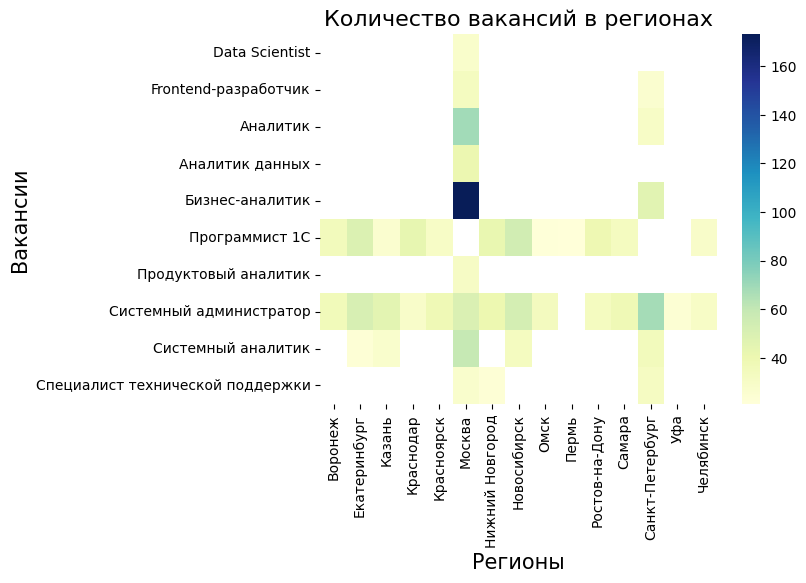

In [88]:
# Подключение библиотек
import seaborn as sns
import matplotlib.pyplot as plt
# Формируем список регионов-миллионников
million_cities = ['Москва', 'Санкт-Петербург','Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск',
                  'Омск', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
list_str="'"+"','".join(million_cities)+"'"

# код запроса представляет из себя строковую переменную
#     обьединяем таблицу вакансий с регионами 
#     применяем фильтр по  регионов-миллионников и количеству
#     группируем по названию региона и вакансий
#     подсчитываем количество строк вошедших в группы
query = f'''SELECT a.name AS area,
                    v.name,
                    COUNT(*) AS cnt                   
            from VACANCIES AS v
                LEFT JOIN AREAS AS a  ON v.area_id=a.id
            WHERE a.name in ({list_str})
            GROUP BY a.name,v.name
            HAVING COUNT(*)>20            
        '''
# вывод таблицы
temp2=zapr(query ).pivot_table(
    values='cnt',   # Значения с которыми производим операции
    index='name',    # название строк и группировка по значению
    columns='area',   # название столбцов и группировка по значению
    )
# таблица
heatmap = sns.heatmap(data=temp2, cmap='YlGnBu')
# надписи
plt.ylabel('Вакансии', fontsize = 15)
plt.xlabel('Регионы', fontsize = 15)
heatmap.set_title('Количество вакансий в регионах', fontsize=16);

### Выводы
На гистограмме можно сделать вывод что вакансия "Data Scientist" наблюдается в Москве. Вакансия "Программист 1С" отсутствует в Москве, а вакансия "Системный администратор" отсутствуеп только в Перми. Вакансия "Бизнес_аналитик" самая востребованая

# *3
Давайте узнаем минимальные и максимальный навыки Дата сайнтиста

In [89]:
# создаём список для фильтра вакансий
pro_list =["data scientist","data science","исследователь данных","machine learning","машинн%обучен"]
str_list="( name LIKE '%ML%' AND name NOT LIKE '%HTML%' )"
for index in pro_list:
    str_list+=f" OR name iLIKE '%{index}%'"

# код запроса представляет из себя строковую переменную
# применяем фильтр и исключаем NULL
# вычисляем длинну сткоки и
# вычитаем длинну строки без учёта "\t" тем самым получаем сколько у нас разделителей навыков и +1 
# вычисляем минимум и максимум
query = f'''SELECT MIN(length(key_skills) - length(replace(key_skills,'\t','')) +1),
                    MAX(length(key_skills) - length(replace(key_skills,'\t','')) +1)              
            FROM vacancies
            WHERE ({str_list}) AND key_skills IS NOT NULL
        '''
# вывод результата
print('Минимальное количество ключевых навыков:',zapr(query).iloc[0,0]) 
print('Максимальное количество ключевых навыков:',zapr(query).iloc[0,1]) 

Минимальное количество ключевых навыков: 1
Максимальное количество ключевых навыков: 20


Интересно что за вакансия с одним навыком 

In [90]:
# создаём список для фильтра вакансий
pro_list =["data scientist","data science","исследователь данных","machine learning","машинн%обучен"]
str_list="( name LIKE '%ML%' AND name NOT LIKE '%HTML%' )"
for index in pro_list:
    str_list+=f" OR name iLIKE '%{index}%'"

# код запроса представляет из себя строковую переменную
# применяем фильтр и исключаем NULL
# добавляем к таблицы колонку "col" в которой вычисляем длинну сткоки и
# вычитаем длинну строки без учёта "\t" тем самым получаем сколько у нас разделителей навыков и +1 
# фильтруем по количеству ключевых навыков
query = f'''SELECT *
            FROM
            (SELECT *,
            (length(key_skills) - length(replace(key_skills,'\t','')))+1  AS col          
            FROM vacancies
            WHERE ({str_list}) AND key_skills IS NOT NULL) AS z
            WHERE col=1
        '''
# вывод результата
zapr(query)

,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id,col
0,54891900,Tech Lead Machine Learning,DS,Полный день,От 3 до 6 лет,Полная занятость,None,None,1,5599143,1
1,55573414,Golang-разработчик в ML,Golang,Полный день,От 1 года до 3 лет,Полная занятость,None,None,4,78638,1
2,54814282,ML Engineer (рекомендательная система),Python,Полный день,От 1 года до 3 лет,Полная занятость,None,None,66,3529,1
3,52211622,Project Manager ML проектов,Управление проектами,Полный день,От 3 до 6 лет,Полная занятость,None,None,1,1272486,1


### Вывод
Получилось 4 вакансии и ключевой навык Python который мы уже изучили

# *4
Давай те посмотрим минимальную и максимальную ЗП

In [91]:
# код запроса представляет из себя строковую переменную
# Применяем агрегирующию функцию MIN и MAX
query = f'''select MIN(salary_from) AS AVG_MIN,
                    MAX(salary_to) AS AVG_MAX
            from VACANCIES     
         '''
# вывести результат
print ('Минималиная зарплаты:',zapr(query).iloc[0,0])
print ('Максимальная зарплаты:',zapr(query).iloc[0,1])

Минималиная зарплаты: 30
Максимальная зарплаты: 1000000


Смешное минимально значение

In [92]:
# код запроса представляет из себя строковую переменную
# добавляем колонки с MIN и MAX
# фильтруем
query = f'''SELECT *
            FROM
            (select *,MIN(salary_from) OVER() AS AVG_MIN,
                    MAX(salary_to) OVER() AS AVG_MAX
            from VACANCIES) AS z 
            WHERE AVG_MIN=salary_from OR AVG_MAX=salary_to  
         '''
# вывести результат
zapr(query)

,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id,avg_min,avg_max
0,66097724,QA Automation Engineer,Тестирование\tHTML\tJavaScript\tGit\tТестирова...,Полный день,От 1 года до 3 лет,Полная занятость,400000,1000000.0,160,703174,30,1000000
1,50779568,СТО/Директор по разработке,Laravel\tУправление проектами\tPHP\tVue.js\tPo...,Полный день,От 3 до 6 лет,Полная занятость,500000,1000000.0,1,988480,30,1000000
2,66145376,Помощник IT-специалиста,Adobe Photoshop\tHTML\tWeb\tОпрятный внешний в...,Полный день,Нет опыта,Полная занятость,30,NaN,237,3046483,30,1000000
3,53692636,Брокер по продаже апартаментов,Ведение переговоров\tТелефонные переговоры\tРа...,Полный день,От 1 года до 3 лет,Полная занятость,500000,1000000.0,237,1625845,30,1000000
4,54816956,Системный администратор,Настройка ПО\tНастройка серверов\tАдминистриро...,Полный день,От 1 года до 3 лет,Полная занятость,30,50000.0,104,792907,30,1000000
5,66073664,Помощник IT-специалиста,Adobe Photoshop\tHTML\tWeb\tОпрятный внешний в...,Полный день,От 1 года до 3 лет,Полная занятость,30,NaN,237,3046483,30,1000000


### Вывод
Хороше что это не наши специальности

In [98]:
import plotly.express as px
#  создаём список для фильтра вакансий
pro_list =["data scientist","data science","исследователь данных","machine learning","машинн%обучен"]
str_list="( name LIKE '%ML%' AND name NOT LIKE '%HTML%' )"
for index in pro_list:
    str_list+=f" OR name iLIKE '%{index}%'"

# код запроса представляет из себя строковую переменную
# фильтруем по вакансии и убираем если зарплата не заполнена в 2 ячейках
# группируем по опыту работы
# с помощью функции "COALESCE" меняем ячейку с NULL на ячейку с заполненой зарплатой, 
# а фильток отсек условия что сразу в 2 ячейках NULL
# суммируем делим на 2 и находим среднее значение и округляем
query = f'''SELECT (COALESCE(salary_from , salary_to)+COALESCE(salary_to , salary_from))/2 AS salary           
            FROM vacancies
            WHERE ({str_list}) AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
        ''' 

# вывести результат
fig=px.box(
zapr(query),
x= 'salary',
points="all"
).update_layout( 
    title={"text": "График ЗП", "x": 0.5}
)
fig.show()         


In [ ]:
# не забываем закрыть соединение после окончания работы
connection.close()